<a href="https://colab.research.google.com/github/erfan-sams/dp/blob/main/fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# fashion_mnist = tf.keras.datasets.mnist

In [ ]:
# load fashion_mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
"""normalizing data"""
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
# labels length
k = len(np.unique(y_train))

In [ ]:
# the data is only 2D!
# convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
# import NN libraries
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
rmsprob = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,name="RMSprop")
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)
adadelta = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta"
)
nadam = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)
adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)

In [ ]:
one_opt_list = {'sgd':sgd, 'rmsprob':rmsprob, 'adam':adam,'adamax':adamax}
two_opt_list = {'adadelta':adadelta, 'nadam':nadam, 'adagrad':adagrad}           

In [ ]:
def learn(opt):
  i = Input(shape=X_train[0].shape)
  x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
  x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
  x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(512, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(k, activation='softmax')(x)

  model = Model(i, x)

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics='accuracy',)
  model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15) #, callbacks= early_stop)
  return model

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0966 - accuracy: 0.6072 - val_loss: 0.6626 - val_accuracy: 0.7555
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6316 - accuracy: 0.7672 - val_loss: 0.5646 - val_accuracy: 0.7898
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5572 - accuracy: 0.7917 - val_loss: 0.5220 - val_accuracy: 0.8070
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5204 - accuracy: 0.8077 - val_loss: 0.5086 - val_accuracy: 0.8099
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4904 - accuracy: 0.8204 - val_loss: 0.4747 - val_accuracy: 0.8235
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4690 - accuracy: 0.8264 - val_loss: 0.4608 - val_accuracy: 0.8304
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4518 - accuracy: 0.8327 - val_loss: 0.4439 - val_accuracy:

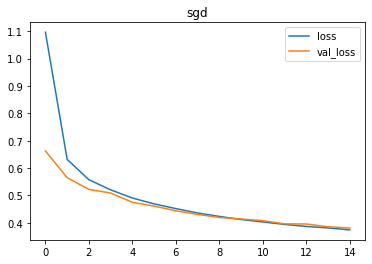

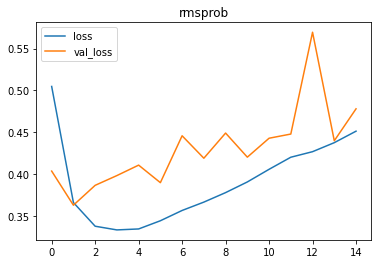

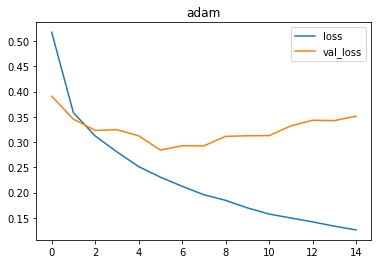

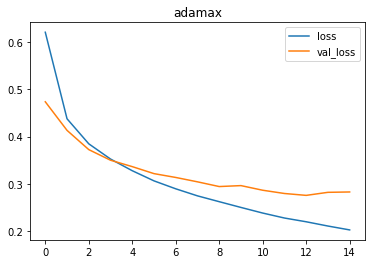

In [ ]:
# part 1
# create CNN model
for opt in one_opt_list:
  model = learn(one_opt_list[opt])
  losses = pd.DataFrame(data=model.history.history)
  predict = model.predict(X_test).argmax(axis=1)
  print('optimizer:',opt)
  losses[['loss', 'val_loss']].plot()
  plt.title(opt)
  print(classification_report(y_test, predict))

Epoch 1/15
1875/1875 [==============================] - 12s 4ms/step - loss: 2.2974 - accuracy: 0.1379 - val_loss: 2.2888 - val_accuracy: 0.2656
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2804 - accuracy: 0.2684 - val_loss: 2.2657 - val_accuracy: 0.3771
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2511 - accuracy: 0.3228 - val_loss: 2.2228 - val_accuracy: 0.4114
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1946 - accuracy: 0.3485 - val_loss: 2.1400 - val_accuracy: 0.4356
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0888 - accuracy: 0.3925 - val_loss: 1.9892 - val_accuracy: 0.4627
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9122 - accuracy: 0.4432 - val_loss: 1.7545 - val_accuracy: 0.5322
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6826 - accuracy: 0.4766 - val_loss: 1.4981 - val_accuracy

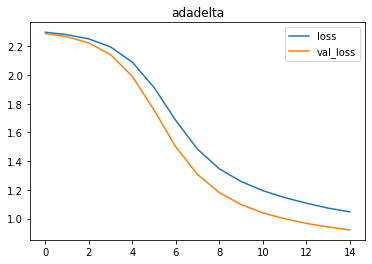

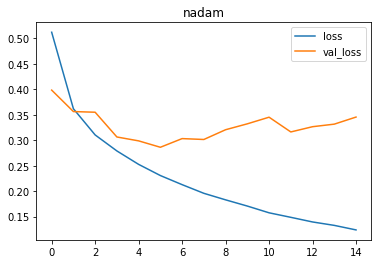

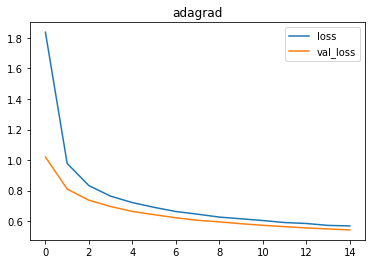

In [ ]:
# part 2
# create CNN model
for opt in two_opt_list:
  model = learn(two_opt_list[opt])
  losses = pd.DataFrame(data=model.history.history)
  predict = model.predict(X_test).argmax(axis=1)
  print('optimizer:',opt)
  losses[['loss', 'val_loss']].plot()
  plt.title(opt)
  print(classification_report(y_test, predict))

In [ ]:
# predict = model.predict(X_test).argmax(axis=1)

In [ ]:
# print(classification_report(y_test, predict))

In [ ]:
# conf_arr = confusion_matrix(y_test, predict)

In [ ]:
# plt.figure(figsize=(12,7))
# sb.heatmap(conf_arr, cmap='BuGn', annot=True)

In [ ]:
# Label mapping
# labels = '''T-shirt/top
# Trouser
# Pullover
# Dress
# Coat
# Sandal
# Shirt
# Sneaker
# Bag
# Ankle boot'''.split("\n")


In [ ]:
# # Show some misclassified examples
# misclassified_idx = np.where(predict != y_test)[0]
# i = np.random.choice(misclassified_idx)
# plt.imshow(X_test[i].reshape(28,28), cmap='gray')
# plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predict[i]]));
# # plt.title("True label: %s Predicted: %s" % (y_test[i], predict[i]));